# 1. 시계열

## 데이터  : 태양광 발전량


## 1-1. 데이터의 정상성을 평가하고 시계열 분석에 적합한 형태로 변환하시오.


In [36]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
data = pd.read_csv('solar_energy2.csv')

In [38]:
data.set_index('Unnamed: 0', inplace = True)

In [39]:
data.index = pd.to_datetime(data.index)
data = data.asfreq(freq = 'h')

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

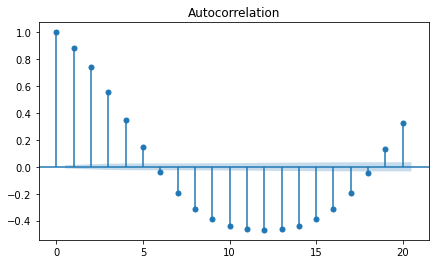

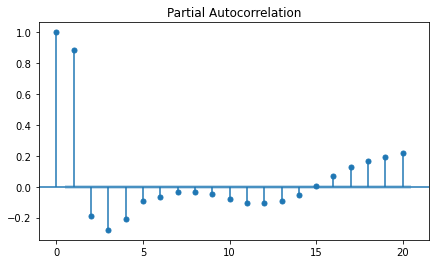

In [41]:
plt.rcParams['figure.figsize'] = (7, 4)
plot_acf(data['TARGET'], lags = 20)
plot_pacf(data['TARGET'], lags = 20)
plt.show()

In [42]:
y = data['TARGET']
y1dif = data['TARGET'].diff(periods = 1).dropna()

result = adfuller(y)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : -10.115258184029768
원 데이터의 P-value : 9.762464305981246e-18

1차 차분 데이터의 ADF 값 : -35.88944395000848
1차 차분 데이터의 P-value : 0.0


In [43]:
from statsmodels.tsa.stattools import kpss

In [44]:
statistic, p_value, n_lags, critial_values = kpss(data['TARGET'])

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 1.0204182253677017
P-value : 0.01
num_lags : 49
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1881: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [45]:
statistic, p_value, n_lags, critial_values = kpss(data['TARGET'].diff(periods = 1).dropna())

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.004106433942492261
P-value : 0.1
num_lags : 49
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


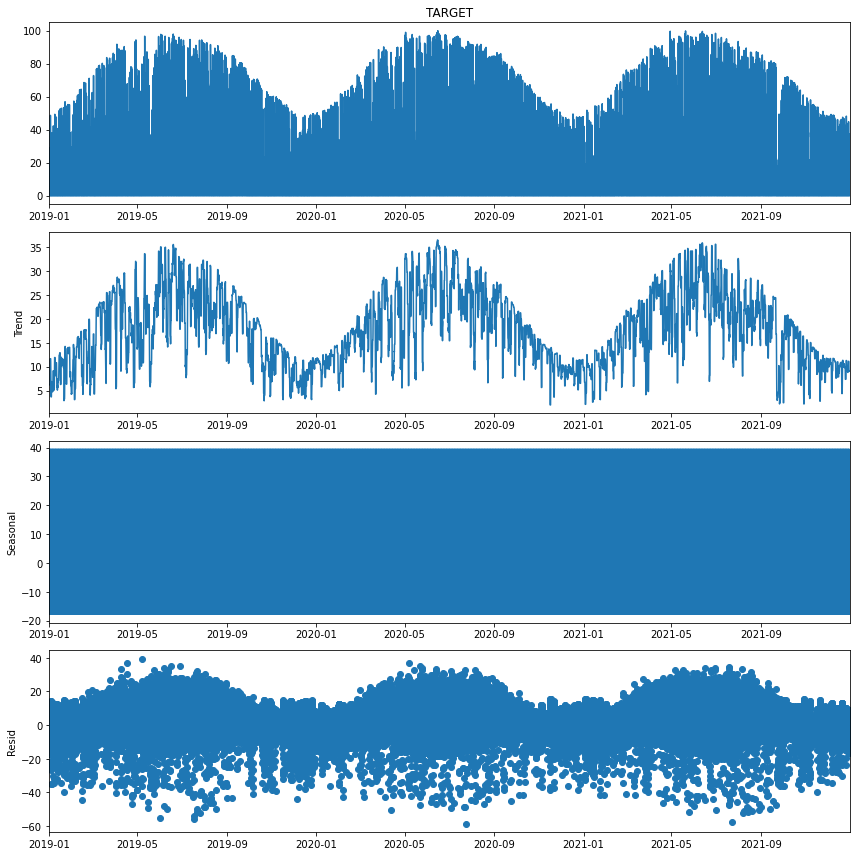

In [46]:
plt.rcParams['figure.figsize'] = [12, 12]

result = seasonal_decompose(data['TARGET'], model='additive')
result.plot()
plt.show()

## 1-2. 정상성을 충족한 후 SARIMAX를 활용하여 향후 24시간의 발전량을 예측하시오.

## 1-3. 모형의 사후 분석을 수행하시오.(잔차분석 등)

# 2. 텍스트 마이닝

## 데이터 : Opinion Review

In [47]:
import glob, os
import pandas as pd

In [48]:
# 본인 PC 디렉터리 주소
path = '/Users/kisehyun/study_code/ADP/21th/topics'

In [49]:
all_files = glob.glob(os.path.join(path, '*.data'))

In [50]:
f_name_list = []
opinion_text = []

In [51]:
for f in all_files :
    df = pd.read_table(f, index_col = None, header = 0, encoding = 'latin1')
    f_name = f.split('/')[-1]
    f_name = f_name.split('.')[0]
    
    f_name_list.append(f_name)
    opinion_text.append(df.to_string().replace('   ', ''))
    
data = pd.DataFrame({'filename' : f_name_list, 'opinion_text' : opinion_text})
data.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ....
1,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly...
2,room_holiday_inn_london,"We arrived at 23,30 hours and they could not r..."
3,location_holiday_inn_london,Great location for tube and we crammed in a f...
4,staff_bestwestern_hotel_sfo,Staff are friendly and helpful.\n0The staff i...


## 2-1. 해당 데이터를 전처리하고 빈도 상위 50개 단어를 워드클라우드 형태로 출력하시오(스타일은 무관)

In [52]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kisehyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kisehyun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


데이터를 살펴봤을 때 줄바꿈이 일어날 때마다 개행문자와 숫자가 같이 등장하고 있다. 

정규식을 활용해서 개행문자 부분을 처리한다.

In [53]:
data['opinion_text'] = data['opinion_text'].str.lower()

In [54]:
data['opinion_text'] = [re.sub(r'\n[0-9]+', ' ', x) for x in data['opinion_text']]

In [55]:
data['opinion_text'] = [re.sub(r'[.?!,]', ' ', x) for x in data['opinion_text']]

In [56]:
stop = set(stopwords.words('english'))

In [57]:
def remove_stopword(x) :
    token = word_tokenize(x)
    f_token = [t for t in token if t not in stop]
    return f_token    

In [58]:
data['token'] = data['opinion_text'].apply(remove_stopword)

In [59]:
counter = Counter(data.token.sum())

In [60]:
top50 = dict(counter.most_common(50))

In [61]:
wc = WordCloud(font_path = 'AppleGothic', background_color = 'white', stopwords = STOPWORDS).generate_from_frequencies(top50)

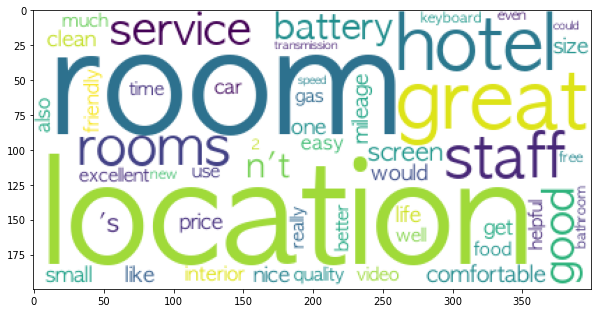

In [62]:
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.show()

## 2-2. 문서들을 군집화를 수행하고 각 군집별로 주제 분석을 시행하시오.(주제수 및 군집수 무관)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tf = TfidfVectorizer(max_features = 2500, ngram_range = (1, 2), lowercase = False)

2-gram을 활용하여 최대 2500개의 단어를 추출한다.

In [65]:
token_list = []
for t in data['token'] :
    c = ''
    for n in range(len(t)) :
        text = t[n] + ' '
        c += text
    token_list.append(c)

In [66]:
tfidf = tf.fit_transform(token_list)
X = tfidf.todense()

In [68]:
X = pd.DataFrame(X, columns = tf.get_feature_names())

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans(n_clusters = 5, max_iter = 3000, random_state = 31)

기본적으로 5개 군집화를 진행한다.

In [71]:
km.fit(X)

KMeans(max_iter=3000, n_clusters=5, random_state=31)

In [72]:
cls = km.labels_

In [73]:
cls_center = km.cluster_centers_

In [74]:
data['cls'] = cls

In [75]:
data.cls.value_counts()

1    16
2    15
0    10
4     7
3     3
Name: cls, dtype: int64

레이블이 없는 데이터이기 때문에 실루엣 스코어로 군집화 결과를 평가한다.

In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [79]:
for n in range(2, 11) :
    km = KMeans(n_clusters = n, max_iter = 3000, random_state = 31)
    km.fit(X)
    cls = km.labels_
    data['cls'] = cls
    sil_score = silhouette_samples(X, cls)
    data['sil_score'] = sil_score
    display(data.groupby('cls').sil_score.mean())

cls
0    0.031751
1    0.114825
Name: sil_score, dtype: float64

cls
0    0.113208
1    0.040290
2    0.115456
Name: sil_score, dtype: float64

cls
0    0.048027
1    0.045627
2    0.113660
3    0.112794
Name: sil_score, dtype: float64

cls
0    0.104582
1    0.111281
2    0.020144
3    0.255168
4    0.123571
Name: sil_score, dtype: float64

cls
0    0.111900
1    0.251183
2    0.075112
3    0.084140
4    0.040061
5    0.050593
Name: sil_score, dtype: float64

cls
0    0.067160
1    0.110889
2    0.047014
3    0.108409
4    0.126834
5    0.079865
6    0.043184
Name: sil_score, dtype: float64

cls
0    0.138899
1    0.064764
2    0.091194
3    0.101574
4    0.079128
5    0.077232
6    0.216809
7    0.044071
Name: sil_score, dtype: float64

cls
0    0.026884
1    0.110889
2    0.308861
3    0.066793
4    0.055297
5    0.596606
6    0.045973
7    0.227124
8    0.067160
Name: sil_score, dtype: float64

cls
0    0.054150
1    0.023847
2    0.040218
3    0.085595
4    0.006774
5    0.365896
6    0.246353
7    0.796844
8    0.596553
9    0.738075
Name: sil_score, dtype: float64

실루엣 계수 평가 결과 6개 군집일 때 실루엣 계수가 적합한 것으로 나타났다.

In [80]:
km = KMeans(n_clusters = 6, max_iter = 3000, random_state = 31)

In [81]:
km.fit(X)

KMeans(max_iter=3000, n_clusters=6, random_state=31)

In [82]:
cls = km.labels_

In [83]:
pd.Series(cls).value_counts()

5    12
2    11
0    10
4     9
3     5
1     4
dtype: int64

In [84]:
cls_center = km.cluster_centers_

In [85]:
data['cls'] = cls

In [86]:
from gensim.matutils import Sparse2Corpus

In [87]:
corpus = Sparse2Corpus(tfidf.T)

In [88]:
id2word = dict(enumerate(tf.get_feature_names()))

In [89]:
id2word[10]

'11'

In [90]:
from gensim.models.ldamodel import LdaModel

군집이 6개로 최소 6개부터 최대 10개까지의 데이터가 속해있으므로 주제를 3개로 설정한다.

In [91]:
for n in range(0, 6) :
    print('*' * 20, n, '*' * 20)
    g = data[data.cls == n]
    token_list = []
    for t in g['token'] :
        c = ''
        for n in range(len(t)) :
            text = t[n] + ' '
            c += text
        token_list.append(c)
    tfidf = tf.transform(token_list)
    corpus = Sparse2Corpus(tfidf.T)
    lda = LdaModel(corpus = corpus, num_topics = 3, passes = 5, iterations = 750, id2word = id2word, random_state = 531)
    topics = lda.print_topics(num_words = 7)
    for t in topics :
        print(t)

******************** 0 ********************
(0, '0.001*"performance" + 0.000*"performance handling" + 0.000*"handling" + 0.000*"car" + 0.000*"lacks" + 0.000*"styling" + 0.000*"engine"')
(1, '0.003*"interior" + 0.002*"mileage" + 0.002*"seats" + 0.002*"comfortable" + 0.002*"gas" + 0.002*"gas mileage" + 0.002*"transmission"')
(2, '0.001*"quality" + 0.001*"toyota" + 0.000*"seats" + 0.000*"build quality" + 0.000*"toyota quality" + 0.000*"build" + 0.000*"camry"')
******************** 1 ********************
(0, '0.001*"rooms" + 0.001*"clean" + 0.001*"hotel" + 0.001*"small" + 0.000*"rooms clean" + 0.000*"courtyard" + 0.000*"rooms small"')
(1, '0.001*"rooms" + 0.001*"hotel" + 0.001*"clean" + 0.001*"rooms clean" + 0.001*"chicago" + 0.000*"spacious" + 0.000*"views"')
(2, '0.002*"staff" + 0.001*"friendly" + 0.001*"helpful" + 0.001*"hotel" + 0.001*"staff friendly" + 0.001*"desk" + 0.001*"front desk"')
******************** 2 ********************
(0, '0.002*"screen" + 0.001*"performance" + 0.001*"siz

## 2-3. 군집별로 핵심 단어 10개씩을 추출(군집 중심과 가장 가까운 단어)하시오.

In [92]:
f_nm = tf.get_feature_names()

In [93]:
import numpy as np

In [94]:
for n in range(0, 6) :
    top10 = km.cluster_centers_[n].argsort()[::-1][:10]
    # cluster_centers_의 값이 큰 순으로 정렬된 index값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    print(f'{n}번 cluster의 핵심 단어 10개는 {[f_nm[ind] for ind  in top10]}')

0번 cluster의 핵심 단어 10개는 ['interior', 'mileage', 'seats', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
1번 cluster의 핵심 단어 10개는 ['rooms', 'staff', 'hotel', 'clean', 'friendly', 'helpful', 'staff friendly', 'desk', 'room', 'front desk']
2번 cluster의 핵심 단어 10개는 ['battery', 'screen', 'battery life', 'life', 'keyboard', 'video', 'performance', 'features', 'size', 'faster']
3번 cluster의 핵심 단어 10개는 ['kindle', 'font', 'page', 'eyes', 'buttons', 'navigation', 'button', 'price', 'books', 'book']
4번 cluster의 핵심 단어 10개는 ['directions', 'screen', 'voice', 'speed', 'accurate', 'speed limit', 'map', 'limit', 'display', 'sound']
5번 cluster의 핵심 단어 10개는 ['service', 'hotel', 'room', 'food', 'location', 'bathroom', 'parking', 'room service', 'price', 'free']


0번 군집은 인테리어, 마일리지와 같은 단어들이 핵심 키워드로 나타났다. 1번 군집은 호텔, 음식, 방, 주차 등의 키워드들이 나타났다. 2번 군집은 배터리, 배터리 수명, 키보드, 소리 등이 키워드로 나타났다. 3번 군집은 방, 스태프, 욕실, 청결, 친절 등의 키워드들이 나타났다. 4번 군집은 방향, 정확성, 속도, 지도 등의 키워드가 나타났다. 5번 군집은 스크린, 폰트 등의 키워드가 나타났다.

## 2-4. 비지도학습을 활용하여 감성분석을 시행하시오.

In [95]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kisehyun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


비지도학습 기반 감성분석에는 크게 3가지 방법이 있다. sentiwordnet, vader, pattern 등이 있는데 sentiwordnet은 감성 단어 전용의 wordnet으로 긍정 감성, 부정감성, 객관성 지수를 계산할 수 있다. vader는 SNS에 대한 감성분석으로 비교적 빠른 수행 시간을 보장한다. pattern은 예측 성능에서 가장 주목 받는 패키지이만 파이썬 3.x 버전에는 동작하지 않는다.

해당 데이터는 리뷰에 관한 것으로 주로 SNS에서 확인할 수 있으므로 vader를 사용한다.

In [96]:
analyzer = SentimentIntensityAnalyzer()

In [97]:
def vader_polaity(x, threshold = .5) :
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(x)
    
    agg_score = score['compound']
    final = 1 if agg_score >= threshold else 0
    return final

In [98]:
data['vader_pred'] = data.opinion_text.apply(lambda x : vader_polaity(x, 0.5))

In [99]:
data.vader_pred.value_counts()

1    50
0     1
Name: vader_pred, dtype: int64